**Bank case**

by: Eduardo Farías

**Introduction** <br>
In the following case about clients of a chilean bank with 1000 rows x 31 column where the first 30 columns is about unknown parameters and the columns 31 is about if the client finished to pay his credit, And It is expected to create a model that predict the last variable to know if new client will be able to pay or not their credits. <br>
For this, it will be used supervised models for classification. Desicions tree,  Nearest Neighbors and Logistic regression.

Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier #libraries to create KNN models
from sklearn.model_selection import cross_val_predict, cross_val_score # Libraries to create KNN models
from sklearn.metrics import confusion_matrix # For confusion matrix
from sklearn.metrics import classification_report #To analyze recall and precision
from sklearn.metrics import plot_roc_curve #For roc_auc
from sklearn.preprocessing import StandardScaler #Library to standardize values
%matplotlib inline

load data

its shown data, which has 1000 raws and 31 columns

In [2]:
path = "https://raw.githubusercontent.com/edofarias/Bank-Case/main/bank.csv"
df = pd.read_csv(path, sep=",")
print (df.shape)
df.head()

(1000, 31)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,8,68,5,8,73,6,8,1236,3,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,49,23,3,4,70,3,4,5973,2,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,13,51,5,5,61,4,4,2145,3,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,43,47,6,6,87,5,4,7927,3,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,26,55,6,7,77,6,6,4923,4,1


In [3]:
#Check type var
df.dtypes

0     object
1      int64
2     object
3     object
4      int64
5     object
6     object
7      int64
8     object
9     object
10     int64
11    object
12     int64
13    object
14    object
15     int64
16    object
17     int64
18    object
19    object
20     int64
21     int64
22     int64
23     int64
24     int64
25     int64
26     int64
27     int64
28     int64
29     int64
30     int64
dtype: object

In [4]:
df.nunique()

0       4
1      33
2       5
3      10
4     921
5       5
6       5
7       4
8       4
9       3
10      4
11      4
12     53
13      3
14      3
15      4
16      4
17      2
18      2
19      2
20      5
21     45
22     53
23      5
24      7
25     79
26      7
27      4
28    917
29      5
30      2
dtype: int64

In [5]:
df.groupby(['30']).agg({'30': 'count'})

,30
30,
0,700
1,300


It means there are 700 who didn't pay the credit completely and 300 payed the credit completely.

In [6]:
#non numeric to numeric
df['0'] = pd.to_numeric(df['0'].str[1:])
df['2'] = pd.to_numeric(df['2'].str[1:])
df['3'] = pd.to_numeric(df['3'].str[1:])
df['5'] = pd.to_numeric(df['5'].str[1:])
df['6'] = pd.to_numeric(df['6'].str[1:])
df['8'] = pd.to_numeric(df['8'].str[1:])
df['9'] = pd.to_numeric(df['9'].str[1:])
df['11'] = pd.to_numeric(df['11'].str[1:])
df['13'] = pd.to_numeric(df['13'].str[1:])
df['14'] = pd.to_numeric(df['14'].str[1:])
df['16'] = pd.to_numeric(df['16'].str[1:])
df['18'] = pd.to_numeric(df['18'].str[1:])
df['19'] = pd.to_numeric(df['19'].str[1:])
df.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
dtype: object

In [7]:
df.head() #check new dataframe

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,11,6,34,43,1169,65,75,4,93,101,...,8,68,5,8,73,6,8,1236,3,0
1,12,48,32,43,5951,61,73,2,92,101,...,49,23,3,4,70,3,4,5973,2,1
2,14,12,34,46,2096,61,74,2,93,101,...,13,51,5,5,61,4,4,2145,3,0
3,11,42,32,42,7882,61,74,2,93,103,...,43,47,6,6,87,5,4,7927,3,0
4,11,24,33,40,4870,61,73,3,93,101,...,26,55,6,7,77,6,6,4923,4,1


test to lineal regression

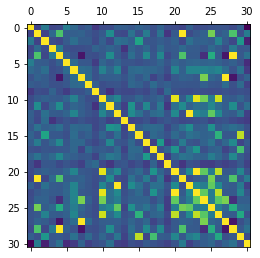

In [8]:
corrMatrix = df.corr() #matrix of corr
plt.matshow(corrMatrix)
plt.show()

Yellow is where is a direct linear regression, and the matrix does not show correlation between vars into the var 30 which is what we want to predict, this because the dependent variable is binary. it may be used logistic regression logit probit

**Solve the problem**

First we separate between our X wich is the first 30 variables, and our Y which is what we want to predict.

In [9]:
df_x = df.iloc[:,0:30]
df_x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,11,6,34,43,1169,65,75,4,93,101,...,5,8,68,5,8,73,6,8,1236,3
1,12,48,32,43,5951,61,73,2,92,101,...,3,49,23,3,4,70,3,4,5973,2
2,14,12,34,46,2096,61,74,2,93,101,...,5,13,51,5,5,61,4,4,2145,3
3,11,42,32,42,7882,61,74,2,93,103,...,6,43,47,6,6,87,5,4,7927,3
4,11,24,33,40,4870,61,73,3,93,101,...,6,26,55,6,7,77,6,6,4923,4


In [10]:
df_y = df.iloc[:,30]
df_y.head()

0    0
1    1
2    0
3    0
4    1
Name: 30, dtype: int64

Now we split the model into 2 groups 70% to train and 30% to test our model.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x.values, df_y.values, 
                                                    stratify=df_y.values, 
                                                    random_state=42, test_size=0.3 ) # here is the selected 30% of observation for testing.
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(700, 30) (700,)
(300, 30) (300,)


As it is expected our Data to train our model is 700 rows x 30 columns and 700 rows x 1 columns. And our Data to test our model is 300 rows x 30 columns and 300 rows x 1 column.

**Model 1: Tree classifier**

Bucle for selection "max_depth"

In [12]:
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,10)):
  tree_model = DecisionTreeClassifier(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  #Generation of list
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))

df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

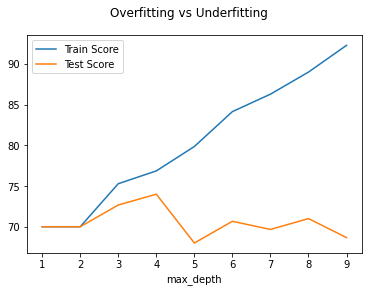

In [13]:
df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

for 1 and 2 is exactly the same for 3 and for is still improving with a little of overfitting, and then in five the test score decrease substantially. Therefore, a max_depth 4 is choosen.

Therefore, we train the model

In [14]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=4)
tree_model.fit(X_train, y_train) #here the model is trained
pred_train = tree_model.predict(X_train)
pred_test = tree_model.predict(X_test)
print("Accuracy over training data: {:.2f}".format(100.0*tree_model.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(100.0*tree_model.score(X_test, y_test)))

Accuracy over training data: 76.86
Accuracy on test data: 74.00


Graph generation for analysis

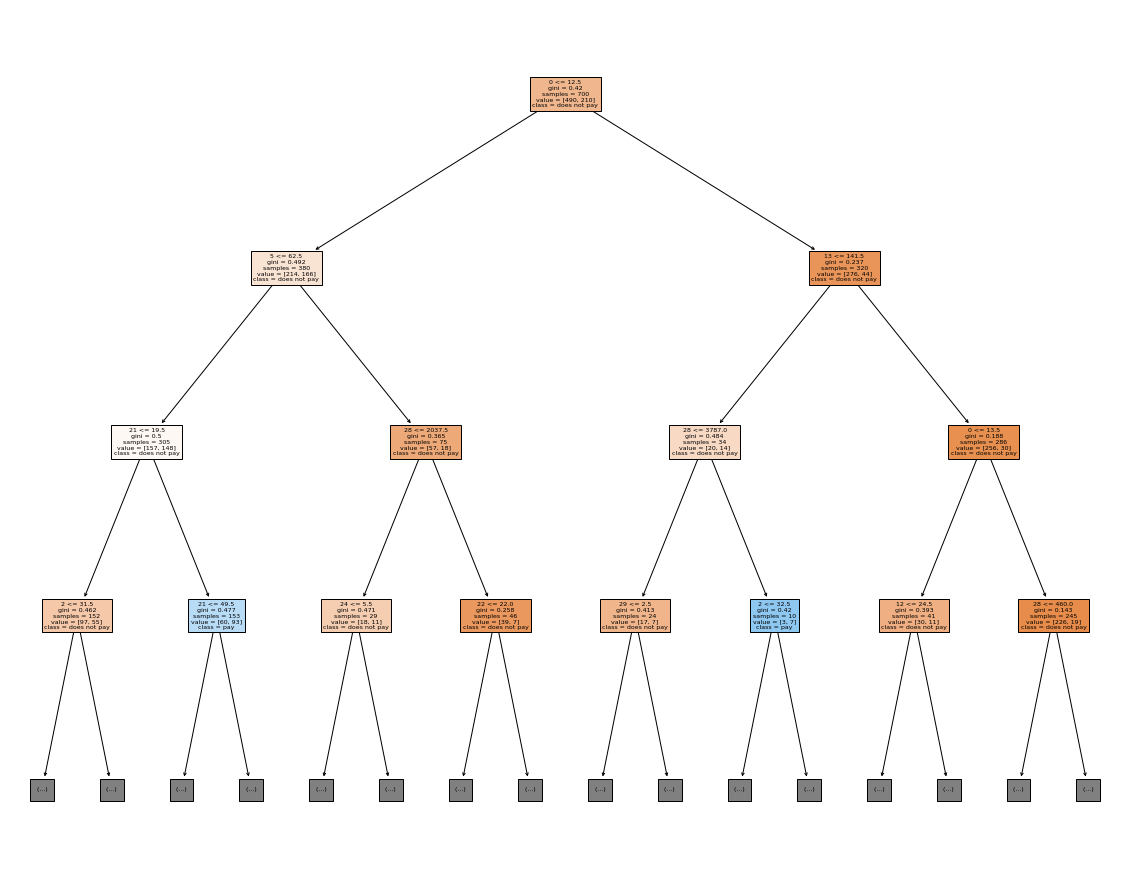

In [15]:

plt.figure(figsize=(20,16))
plot_tree(tree_model, filled=True, max_depth=3, feature_names=df_x.columns, class_names=['does not pay','pay'])
plt.show()

Now is displayed the Confusion matrix

Confusion matrix:



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


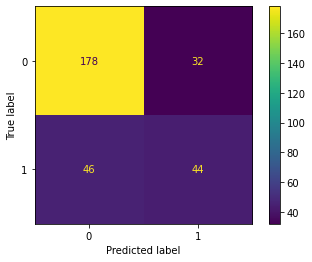

In [16]:
from sklearn.metrics import plot_confusion_matrix # we import library to display confusion matrix
print(f"Confusion matrix:\n")
disp = plot_confusion_matrix(tree_model, X_test, y_test)
plt.show()

for a depth= 4 when the model should predict 0, most of the time it was right, but when it should predict 1 its result is a little more random. Therefore when the model says it is a bad payer it is more reliable than when it says is a well payer.

**Calculation of the Importance of the Variables**

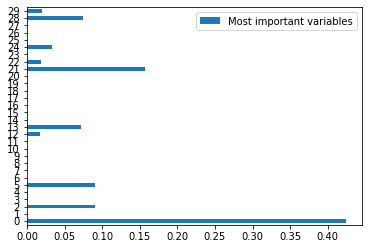

In [17]:
df_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=df_x.columns, index=["Most important variables"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

The most important variables are shown here, considering depth=4. If we choose these 10 variables and run the model again, it should not change substantially. With a depth 3 the variables would be less, and we would lose a bit of fitting, as variables that affect the model the most are removed, the more the prediction will vary.

**Model 2: Logistic regression**

In [18]:
#We start the model
log_regression = LogisticRegression()

#we fit the model using the training data
log_regression.fit(X_train,y_train)

#we use the model to predict the probability that the given y-value is 1
y_pred_proba = log_regression.predict_proba(X_test)[::,1]

#We calculate the AUC of the model
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

0.7812169312169313


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.78 is pretty close to 1, so it's a good model based on this indicator.

**Model 3 KNeighbors**

In [19]:
#Now we scale the variables
scaler = StandardScaler()
scaled = scaler.fit(df_x.iloc[:,0:31]).transform(df_x.iloc[:,0:31])

df_x_scaled = pd.DataFrame(scaled, columns=df_x.columns[:31])
df_x_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.254566,-1.236478,1.344014,-0.103505,-0.745131,1.833169,1.338078,0.918477,0.449326,-0.303686,...,0.850640,-1.186558,2.741147,0.850640,1.356123,1.017416,1.354878,0.918477,-0.733880,0.613229
1,-0.459026,2.248194,-0.503428,-0.103505,0.949817,-0.699707,-0.317959,-0.870183,-0.963650,-0.303686,...,-0.850640,2.213084,-1.199925,-0.850640,-1.129895,0.833001,-0.970427,-0.870183,0.944883,-0.786837
2,1.132053,-0.738668,1.344014,-0.028646,-0.416562,-0.699707,0.510060,-0.870183,0.449326,-0.303686,...,0.850640,-0.771967,1.252297,0.850640,-0.508391,0.279757,-0.195326,-0.870183,-0.411736,0.613229
3,-1.254566,1.750384,-0.503428,-0.128458,1.634247,-0.699707,0.510060,-0.870183,0.449326,3.885083,...,1.701281,1.715575,0.901980,1.701281,0.113114,1.878018,0.579776,-0.870183,1.637369,0.613229
4,-1.254566,0.256953,0.420293,-0.178364,0.566664,-0.699707,-0.317959,0.024147,0.449326,-0.303686,...,1.701281,0.305968,1.602615,1.701281,0.734618,1.263302,1.354878,0.024147,0.572770,2.013295


In [20]:
#Se calcula el K con mejor accuracy o precisión 
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, df_x_scaled, df_y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, df_x_scaled, df_y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [21]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

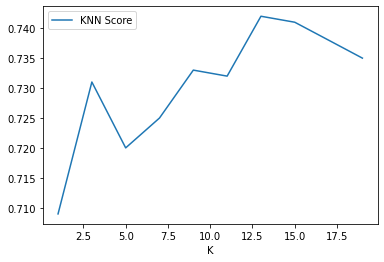

In [22]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

After K=13 begins to decrease, so 13 is the k value choosen, which means how many naeghbour will be used to predict into the model

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=13, weights="uniform", metric="minkowski")
preds = cross_val_predict(knn_model, df_x_scaled, df_y, cv=3, method="predict", n_jobs=3)
score = cross_val_score(knn_model, df_x_scaled, df_y, cv=3, scoring="accuracy", n_jobs=3)
score

array([0.72754491, 0.74474474, 0.75375375])

In [33]:
print(f"Class report:\n"
      f"{classification_report(df_y, preds)}")

Class report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       700
           1       0.66      0.29      0.40       300

    accuracy                           0.74      1000
   macro avg       0.71      0.61      0.62      1000
weighted avg       0.73      0.74      0.70      1000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


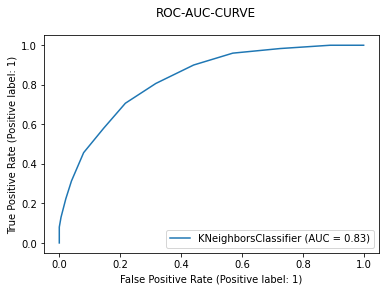

In [25]:
knn_model.fit(df_x_scaled, df_y)
plot_roc_curve(knn_model,df_x_scaled,df_y)
plt.suptitle("ROC-AUC-CURVE")
plt.show()

Conclusions

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


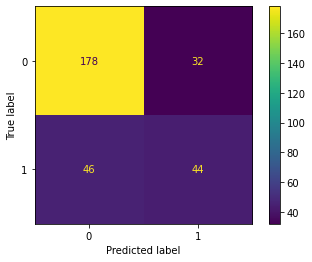

In [26]:
disp = plot_confusion_matrix(tree_model, X_test, y_test)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


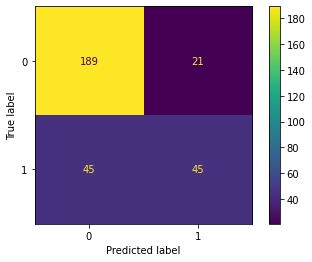

In [27]:
disp = plot_confusion_matrix(log_regression, X_test, y_test)
plt.show()

In [28]:
confusion_matrix(df_y, preds)

array([[663,  37],
       [225,  75]])

When the model has to predict 1, which means the clients does finish his credit, the better option is logistic regression, but it we want to predict 0, which means the clients does not finish his credit, K/means and logistic regressions have a similar performance. <br><br>

The importance of what is most important to predict will depend of the business. For example, depending on how much risk we are able to accept the recall, in other words, the capacity of the model to predict 1 will be the most important. <br><br>

And this decision should be taken in order of how much loose generate a not paid credit loan and how much revenue generate a paid credit loan. Thus, it could be calculated an expected benefit, which will tell us how much revenue we will reject to not giving a credit to well payers and how much looses we will accept to giving a credit to bad payers. <br><br>

For example, for the case of tree model <br>
our True positive is 178 <br>
our True negative is 44 <br>
our False positive is 32 <br>
our False negative is 46 <br><br>

Therefore considering this model with a standard loose and standar revenue for each credit loan. The expected benefit considering cost of oportunity is the following: <br><br>

178 were well rejected so it does not generate any revenue or loss <br>
32 were bad rejected so it generates a loss for cost of oportunity <br>
46 were bad accepted so it generates a loss because we gave the credit loan but are bad payers <br>
44 were well accepted so it does generates a revenue. <br><br>

Then it should be compared with our base case which would be accept to everyone. <br><br>

EB0 = 90 x revenue - 210 x loss <br><br>

EB1 = 44 x revenue  - 46 x loss - 32 x cost of oportunity <br><br>

EB2 = 45 x revenue  - 45 x loss - 21 x cost of oportunity <br><br>

EB3 = 23 x revenue  - 68 x loss - 11 x cost of oportunity <br><br>

Therefore, for high difference between revenue and loss, let's say 1 revenue = 100 loss, then it looks like this <br><br>

EB0 = 88 revenue<br><br>

EB1 = 43.3 revenue<br><br>

EB2 = 44.4 revenue<br><br>

EB3 = 22.8 revenue<br><br>

Aditionally, for revenue equal to loss it looks like this when we consider cost of oportunity <br><br>

EB0 = -120 revenue<br><br>

EB1 = -34 revenue<br><br>

EB2 = -21 revenue<br><br>

EB3 = -59 revenue<br><br>

Finally,  for revenue equal to loss it looks like this when we do not consider cost of oportunity <br><br>

EB0 = -120 revenue<br><br>

EB1 = -2 revenue<br><br>

EB2 = 0 revenue<br><br>

EB3 = -45 revenue<br><br>

In conclusion, When loss are small it is better to give credit to everyone, and when loss are high, it will be beter to use the model of logistic regression.<br><br>

Further work
It is possible keep testing other models for classifier such as:



